In [2]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

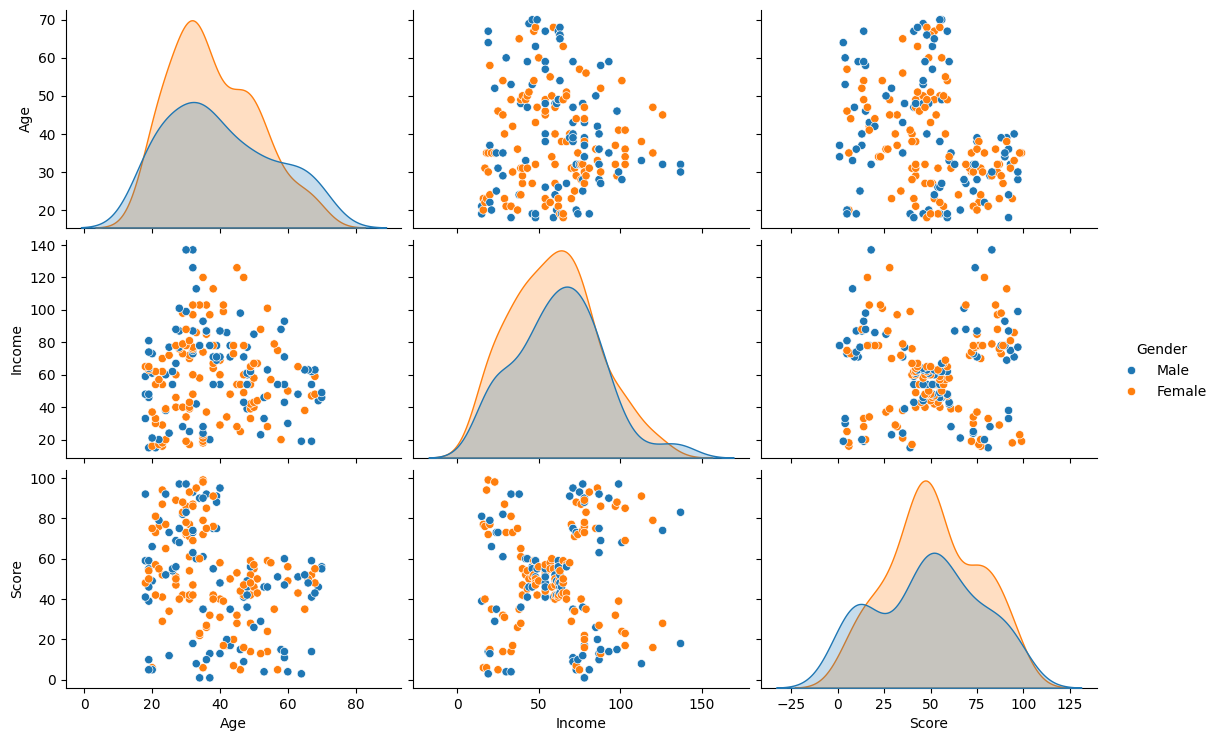

In [6]:
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

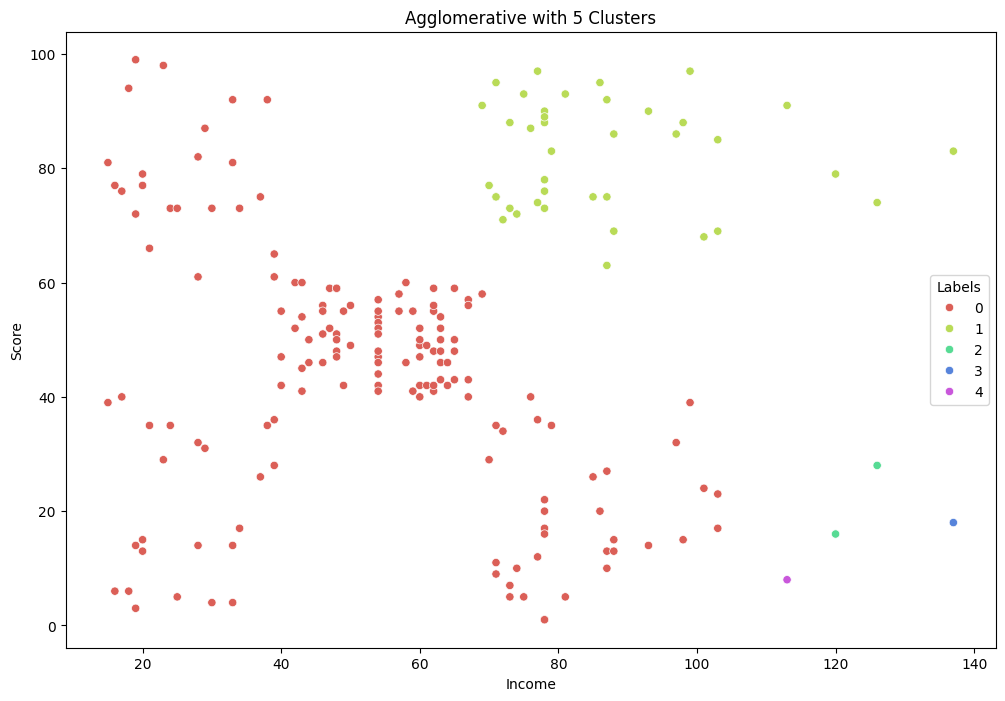

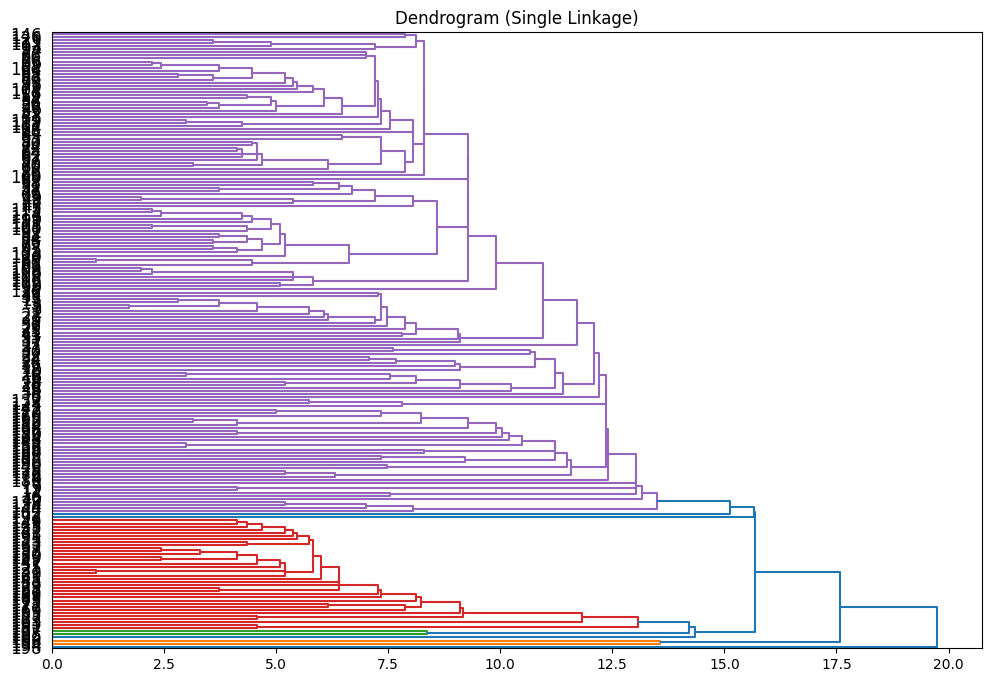

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

# Perform Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=5, linkage='single').fit(X)

# Add cluster labels (ensure X is a DataFrame)
X['Labels'] = agglom.labels_

# Plot the scatter plot with clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels', palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

# Compute the distance matrix and linkage for dendrogram
dist = pdist(X.drop(columns=['Labels']).values, metric='euclidean')  # Exclude labels
Z = hierarchy.linkage(dist, 'single')

# Plot the dendrogram
plt.figure(figsize=(12, 8))  # Adjust size for readability
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')
plt.title('Dendrogram (Single Linkage)')
plt.show()

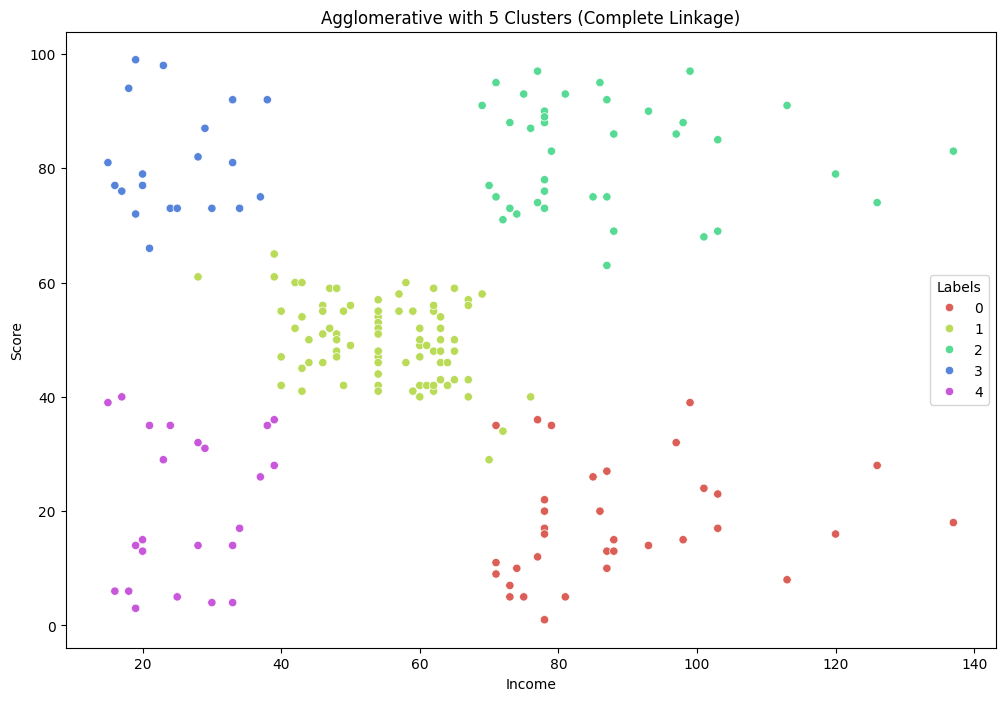

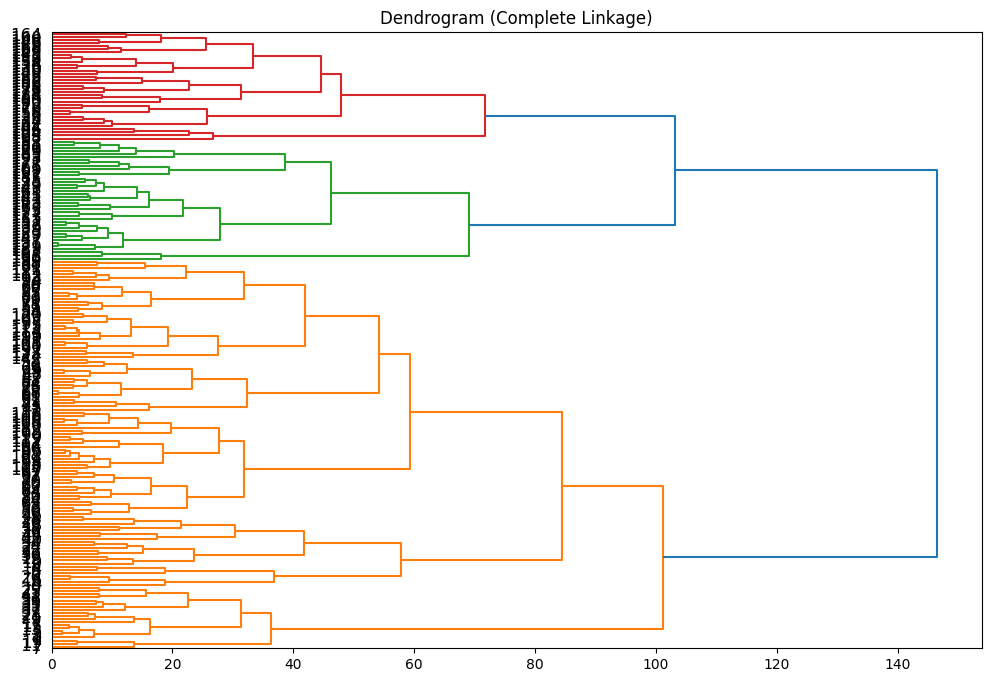

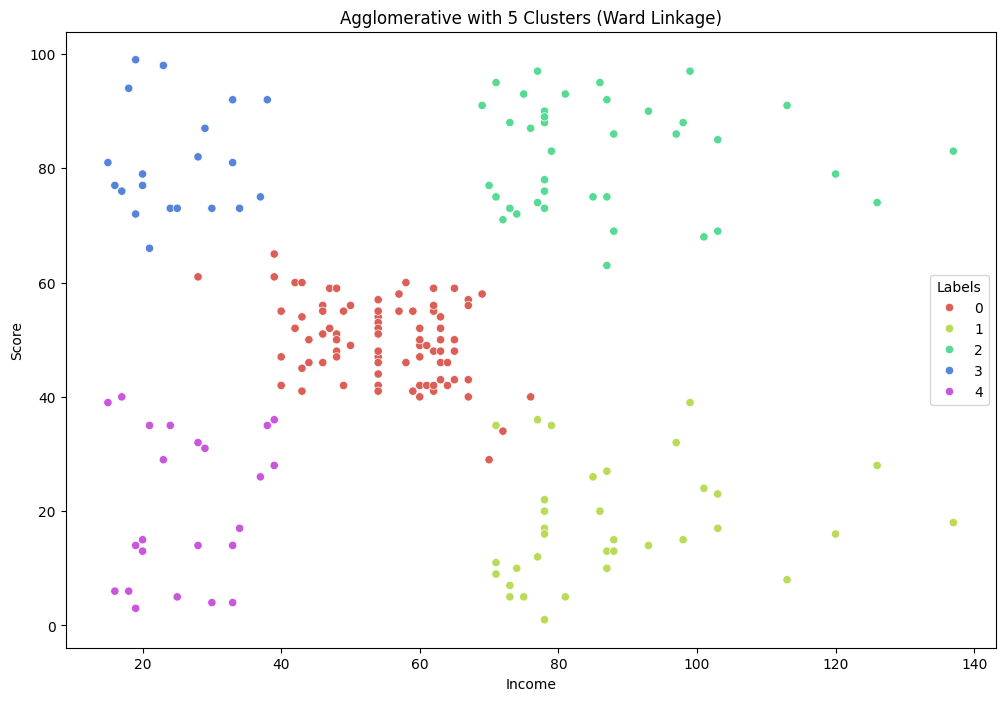

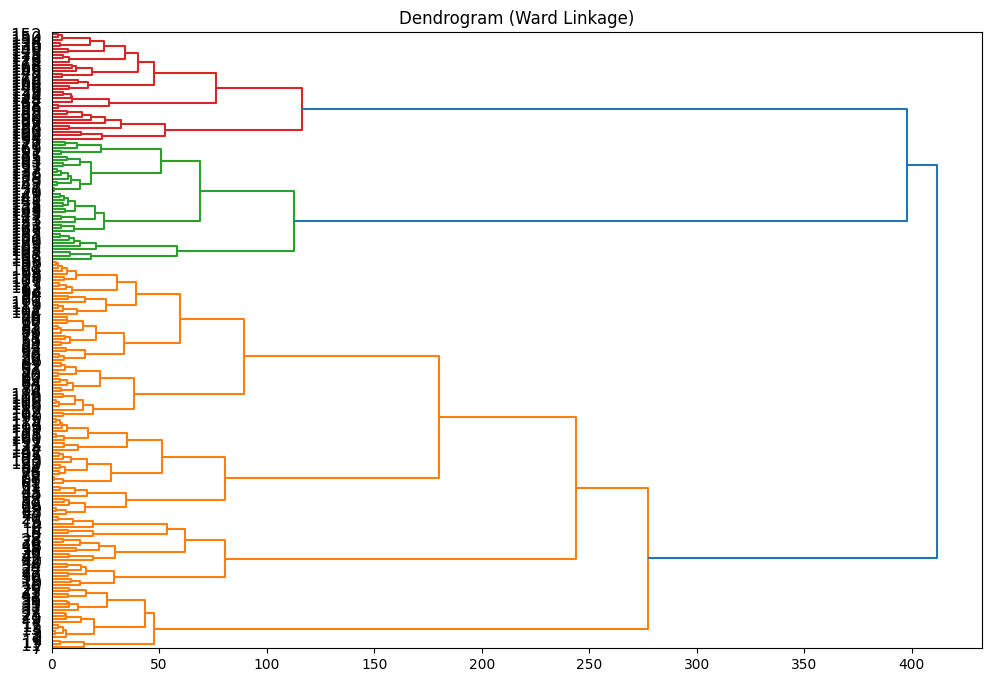

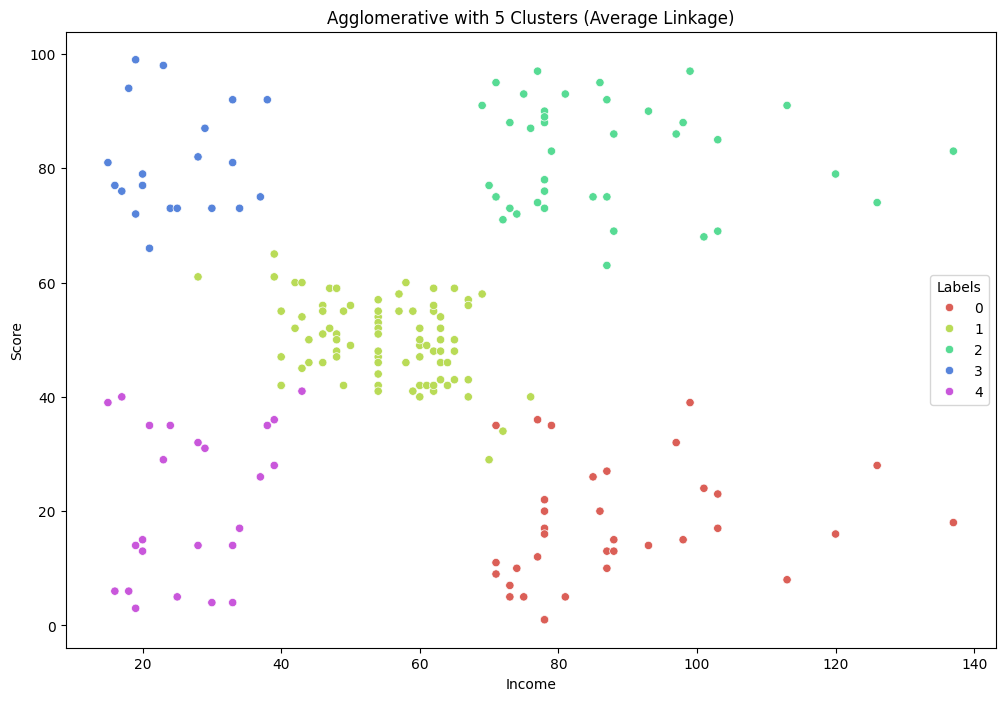

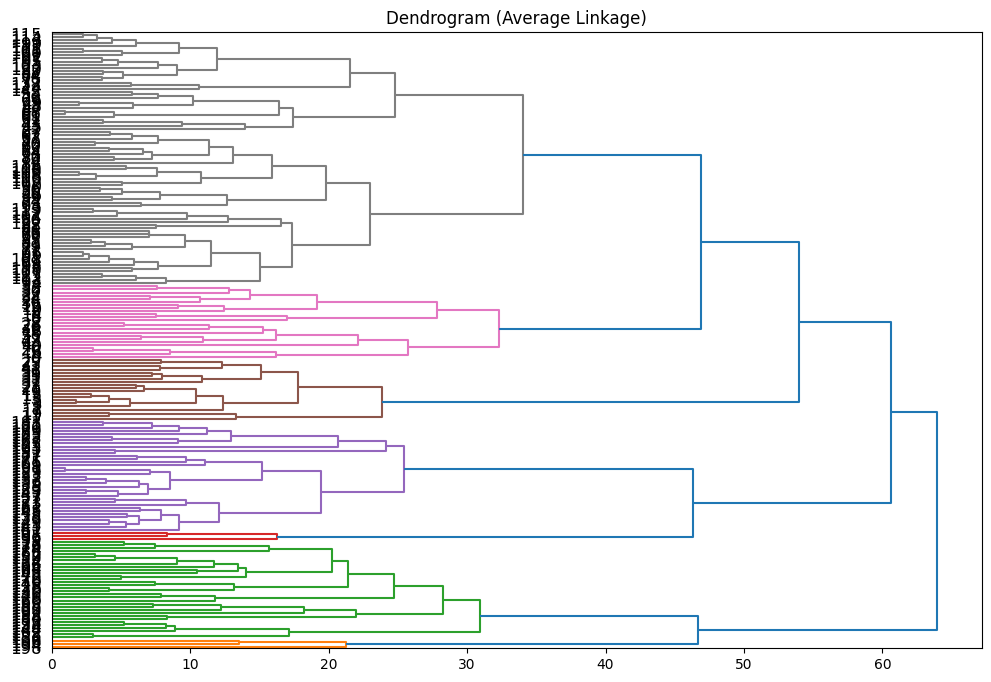

In [8]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

# Linkage methods to explore
linkage_methods = ['complete', 'ward', 'average']  # Note: centroid linkage is equivalent to 'average' in sklearn

for method in linkage_methods:
    # Perform Agglomerative Clustering
    agglom = AgglomerativeClustering(n_clusters=5, linkage=method).fit(X.drop(columns=['Labels'], errors='ignore'))

    # Add cluster labels (ensure X is a DataFrame)
    X['Labels'] = agglom.labels_

    # Plot the scatter plot with clusters
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=X, x='Income', y='Score', hue='Labels', palette=sns.color_palette('hls', 5))
    plt.title(f'Agglomerative with 5 Clusters ({method.capitalize()} Linkage)')
    plt.show()

    # Compute the distance matrix and linkage for dendrogram
    dist = pdist(X.drop(columns=['Labels']).values, metric='euclidean')  # Exclude labels
    Z = hierarchy.linkage(dist, method)

    # Plot the dendrogram
    plt.figure(figsize=(12, 8))  # Adjust size for readability
    dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.show()

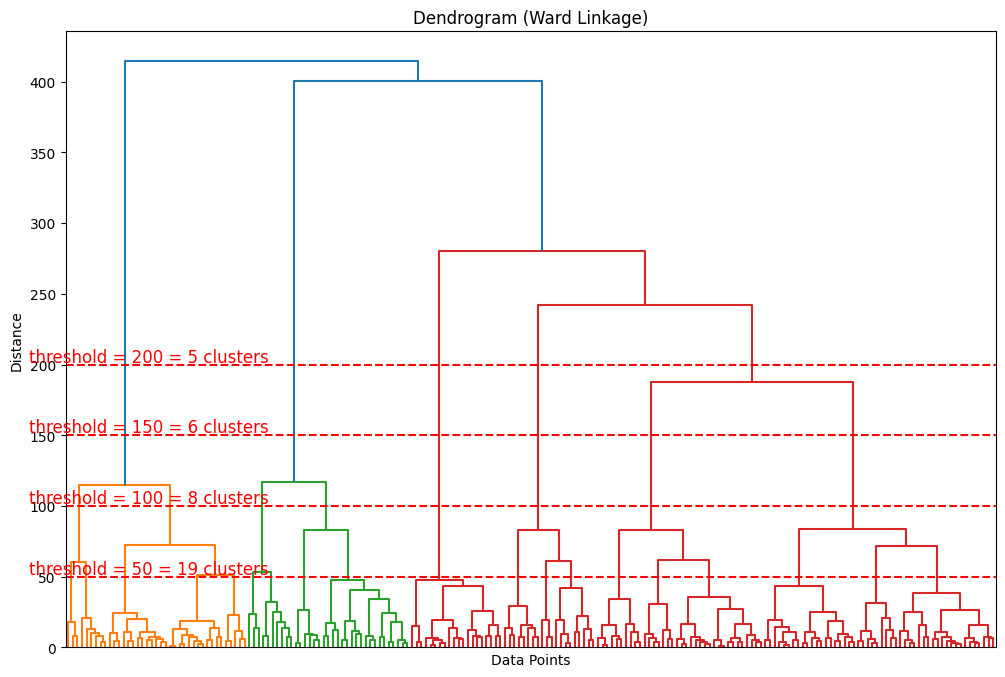

In [19]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the distance matrix and linkage for dendrogram
dist = pdist(X.values, metric='euclidean')  # Assuming X has no 'Labels' column yet
Z = hierarchy.linkage(dist, method='ward')  # Using Ward as an example

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=20, no_labels=True)

plt.axhline(y=200, color='r', linestyle='--')
plt.text(x=len(X) * 0.9, y=202, s='threshold = 200 = 5 clusters', color='r', fontsize=12, ha='center')


plt.axhline(y=150, color='r', linestyle='--')
plt.text(x=len(X) * 0.9, y=152, s='threshold = 150 = 6 clusters', color='r', fontsize=12, ha='center')


plt.axhline(y=100, color='r', linestyle='--')
plt.text(x=len(X) * 0.9, y=102, s='threshold = 100 = 8 clusters', color='r', fontsize=12, ha='center')

plt.axhline(y=50, color='r', linestyle='--')
plt.text(x=len(X) * 0.9, y=52, s='threshold = 50 = 19 clusters', color='r', fontsize=12, ha='center')

plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

By changing the `threshold_distance`, you can determine where to slice the dendrogram to generate the clusters.

Number of clusters determined from dendrogram: 5


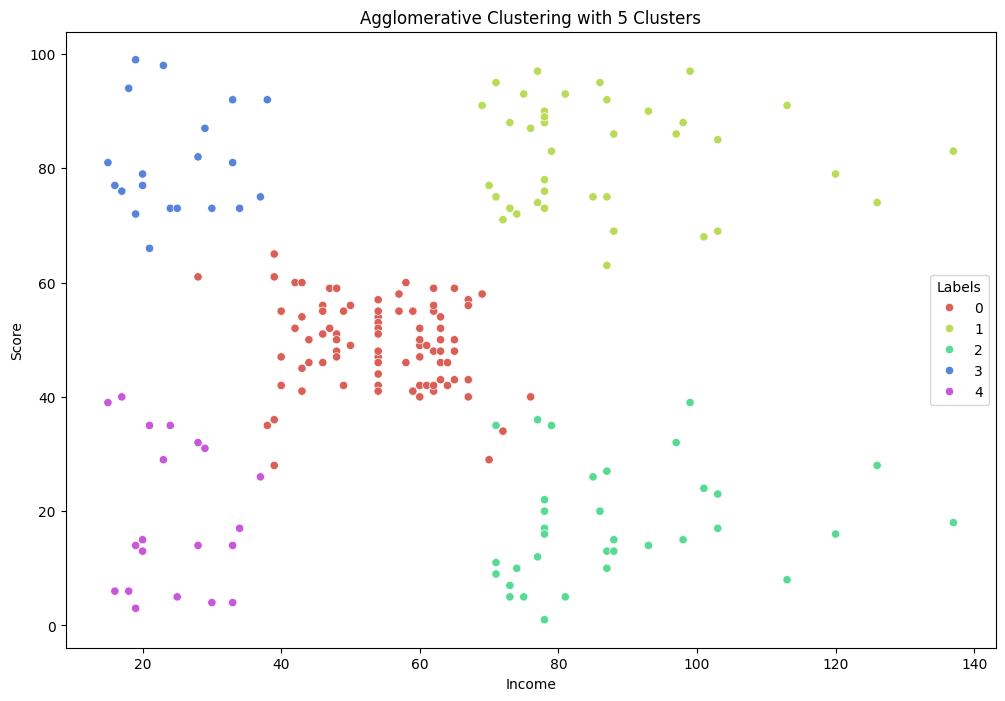

In [20]:
# Select the number of clusters based on a threshold distance (manual or visual selection)
# For example, you can visually inspect the dendrogram and decide on a threshold
threshold_distance = 200  # Adjust this based on the dendrogram
num_clusters = sum(Z[:, 2] > threshold_distance) + 1

print(f"Number of clusters determined from dendrogram: {num_clusters}")

# Perform Agglomerative Clustering using the determined number of clusters
agglom = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward').fit(X)

# Add cluster labels (ensure X is a DataFrame)
X['Labels'] = agglom.labels_

# Plot the scatter plot with clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels', palette=sns.color_palette('hls', num_clusters))
plt.title(f'Agglomerative Clustering with {num_clusters} Clusters')
plt.show()